In [7]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns



Подключение к БД

In [8]:
db = sqlite3.connect('../data/checking-logs.sqlite')

In [9]:
query = """
SELECT uid, numTrials, timestamp
FROM checker
WHERE status ='ready'
AND uid LIKE 'user_%'
AND labname = 'project1'
ORDER BY uid
"""

df = pd.io.sql.read_sql(query, db, parse_dates=['timestamp'])
df.sort_values(by='timestamp')

,uid,numTrials,timestamp
777,user_4,1,2020-04-17 05:19:02.744528
778,user_4,2,2020-04-17 05:22:45.549397
779,user_4,3,2020-04-17 05:34:24.422370
780,user_4,4,2020-04-17 05:43:27.773992
781,user_4,5,2020-04-17 05:46:32.275104
...,...,...,...
278,user_19,26,2020-05-15 10:22:39.698523
279,user_19,27,2020-05-15 10:22:46.248162
280,user_19,28,2020-05-15 10:23:18.043212
656,user_28,27,2020-05-15 10:38:14.430013


## Построение графика с помощью seaborn

Text(0.5, 1.0, 'Dynamic of commits per user in project1')

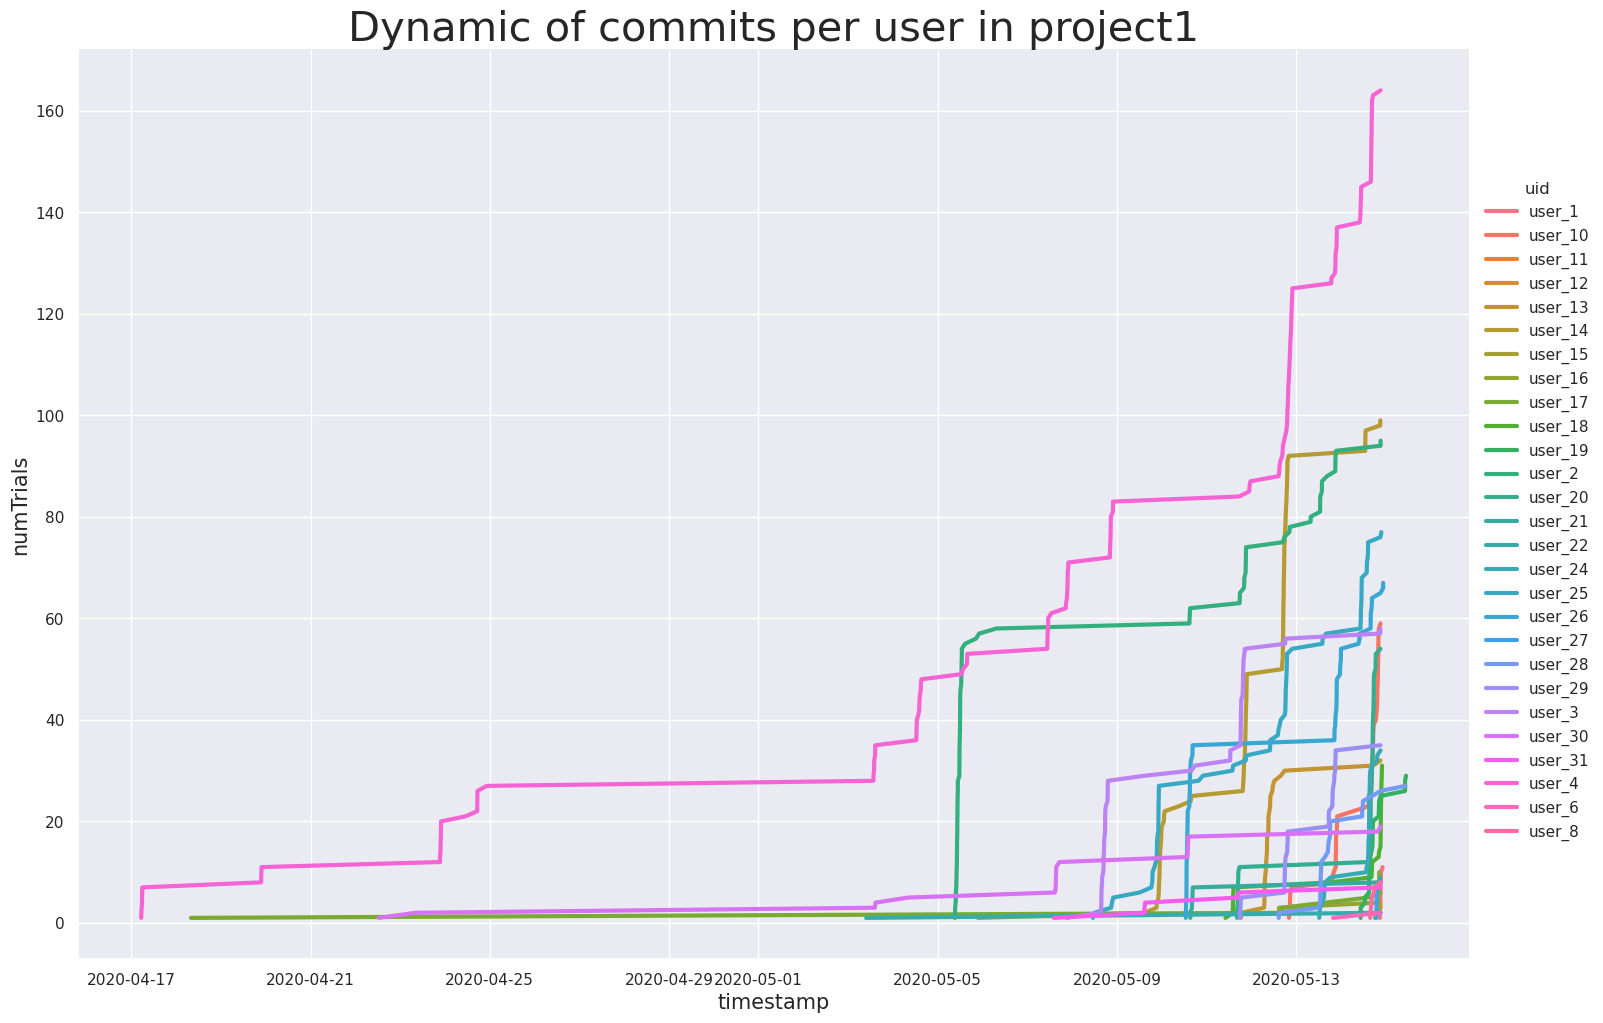

In [14]:

sns.set(rc={'axes.labelsize': 15,
            'lines.linewidth': 3}) 
sns.relplot(data=df,
            x='timestamp',
            y='numTrials',
            legend='full',
            hue='uid', # линии в легенде
            kind='line',
            height=10,
            aspect=1.5) # ширина графика
plt.title("Dynamic of commits per user in project1", fontsize=30)

In [11]:
df[df['numTrials'] == df['numTrials'].max()]

,uid,numTrials,timestamp
940,user_4,164,2020-05-14 21:15:17.580667


Какой пользователь был лидером по количеству коммитов почти все время?

Ответ: user_4

Какой пользователь был лидером только короткий промежуток времени?

Ответ: user_2

In [12]:
db.close()